In [121]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

/var/folders/lh/93lccf9x56l539tw7z9d404r0000gn/T/ipykernel_49140/611362656.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [129]:
opt = np.load('optimized.npz')
unopt = np.load('not_optimized.npz')

In [130]:
data = {}
for i in range(4):
    data["Vehicle " + str(i)] = [opt["consumption"][i], unopt["consumption"][i]]

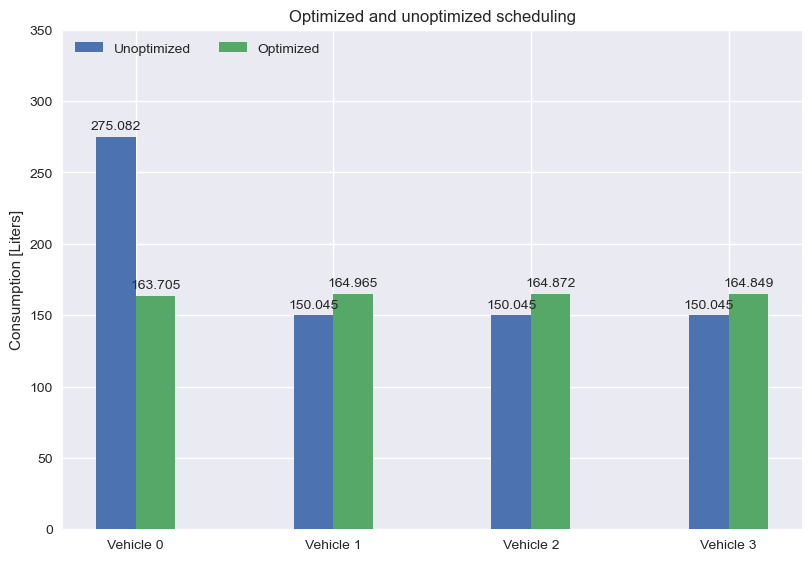

In [131]:
x = np.arange(4)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
centers = []
for i, (attribute, measurement) in enumerate(data.items()):
    offset = width * multiplier

    rects = ax.bar(i + offset, measurement[1], width, color="C0")
    ax.bar_label(rects, padding=3)

    rects = ax.bar(i + offset + width, measurement[0], width, color = "C1")
    centers.append(i + offset + width/2)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Consumption [Liters]')
ax.set_title('Optimized and unoptimized scheduling')

ax.legend(["Unoptimized", "Optimized"], loc='upper left', ncols=3)
ax.set_ylim(0, 350)
ax.set_xticks(np.array(centers), data.keys())
plt.savefig("imgs/consumption.png")
plt.show()


In [132]:
data.keys()

dict_keys(['Vehicle 0', 'Vehicle 1', 'Vehicle 2', 'Vehicle 3'])

In [133]:
opt = 0
unopt = 0
for attribute, measurement in data.items():
    opt += measurement[0]
    unopt += measurement[1]


In [134]:
print(opt/unopt)

0.907853565824549


In [128]:
print(opt)

723.8443094561792
